<center style="font-weight:bold;font-size:26px">Pericolo - API - ImageWarper </center>

# Setup

## Imports

In [1]:
import os
import sys

In [2]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cv2 import aruco
import pandas as pd
from skimage import feature, color, transform, io
from scipy.spatial import distance as dist
from PIL import Image, ImageDraw

In [3]:
sys.path.append(os.path.join(os.path.abspath(''), '..'))
logging.basicConfig(level = logging.INFO)

In [4]:
from libs.image_warper import ImageWarper

## Global Variables

In [5]:
ROOT_FOLDER = os.path.join(os.path.abspath(''), '..')
DATA_FOLDER = os.path.join(ROOT_FOLDER, 'data')
MARKER_FOLDER = os.path.join(ROOT_FOLDER, 'markers')
IMG_FOLDER = os.path.join(DATA_FOLDER, 'img')
ANNOT_FOLDER = os.path.join(DATA_FOLDER, 'annotations')

# Functions definition

## Plot functions

In [6]:
def imshow(img, figsize=(6, 6), cmap=None):
    fig = plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.show()

In [7]:
def imshow_masked(img, mask, figsize=(6,6), factor=0.3):
    fig = plt.figure(figsize=figsize)
    aux_img = img.astype(float)
    aux_mask = np.expand_dims(mask.astype(float)*(1-factor) + factor, axis=-1)
    drk_img = (aux_img * aux_mask).astype(np.uint8)
    plt.imshow(drk_img)
    plt.show()

# Main Code

## Initialisation

Under the `data` folder we have created an `enclosed` folder to distinguish sample images with enclosed markers

In [8]:
os.listdir(os.path.join(DATA_FOLDER, 'enclosed'))

['.DS_Store',
 '20200108_023419.jpg',
 '20200108_023223.jpg',
 '20200108_023344.jpg']

In [9]:
# We start by creating an instance of ImageWarper
image_warper = ImageWarper(os.path.join(DATA_FOLDER, 'enclosed','20200108_023419.jpg'))

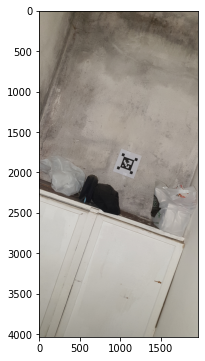

In [10]:
# You can access the image via the image attribute
imshow(image_warper.image)

## Aruco Warping

In [11]:
# To force Warping with Aruco method use the warp_with_marker method
aruco_warped = image_warper.warp_with_marker()
# Logging allow to show progression
# Logging level is set to INFO in case of success and to WARNING in case of failure

INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ARUCO
INFO:root:CHECK - MARKER - ARUCO - SUCCESS
INFO:root:Found matches: 51
INFO:root:Found matches: 72
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED MINIMUM SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED MINIMUM SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED MODERATE SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED MODERATE SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED STRONG SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED STRONG SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER

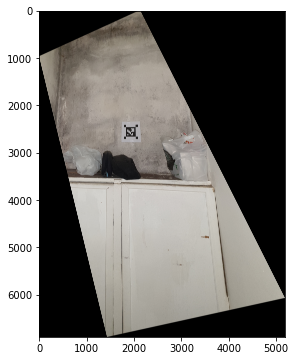

In [12]:
imshow(aruco_warped)

In [13]:
aruco_warped.shape

(6886, 5187, 3)

In [14]:
# You can consult the logs to see what happened during the process
image_warper.logs

{'MARKER - ARUCO': True,
 'ENCLOSED MINIMUM SIFT DETECTION': True,
 'ENCLOSED MODERATE SIFT DETECTION': True,
 'ENCLOSED STRONG SIFT DETECTION': True,
 'UNENCLOSED MINIMUM SIFT DETECTION': True,
 'UNENCLOSED MODERATE SIFT DETECTION': True,
 'UNENCLOSED STRONG SIFT DETECTION': True,
 'MARKER - SIFT IOU': True,
 'MARKER - SIFT IR': True}

## Vanishing point warping

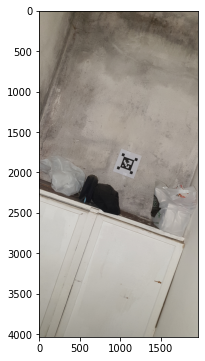

In [15]:
image_warper_vp = ImageWarper(os.path.join(DATA_FOLDER, 'enclosed','20200108_023419.jpg'))
imshow(image_warper.image)

In [16]:
# To force Warping with Vanishing Point method use the warp_without_marker method
aruco_warped = image_warper_vp.warp_without_marker()
# On this example we see that the RANSAC failed because the third condition was not met
# You can tweak the config file to modify this behavior

INFO:root:CHECK - RANSAC - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - RANSAC - EDGELETS NUMBER
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - SUCCESS
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - 2059 edgelets found
/Users/walid/Documents/Projects/Pericolo/notebooks/../libs/vanishing_point_sampling.py:40: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
/Users/walid/Documents/Projects/Pericolo/notebooks/../libs/vanishing_point_sampling.py:45: RuntimeWarning: invalid value encountered in less
  scores = (theta < theta_thresh) * strengths
INFO:root:Current best model has 3196.3255198376837 votes at iteration 0
INFO:root:Current best model has 18246.763360132543 votes at iteration 1
INFO:root:Current best model has 18841.308336138776 votes at iteration 14
INFO:root:Current best model has 18891.042940805848 votes at iteration 316
INFO:root:CHECK - RANSAC - /Users/walid/Documents/Project

In [17]:
# You can check the logs to check what went wrong
image_warper_vp.logs

{'RANSAC - EDGELETS NUMBER': False,
 'RANSAC - MINIMUM SCORE': True,
 'RANSAC VALIDATION': False}

In [18]:
print(aruco_warped)

None


In [19]:
# To modify the configuration without modifying the config file, you can set the argument in the initialisation
image_warper_vp = ImageWarper(
    os.path.join(DATA_FOLDER, 'enclosed','20200108_023419.jpg'), 
    ransac_conditions_to_valid=0.5
)
aruco_warped = image_warper_vp.warp_without_marker()

INFO:root:CHECK - RANSAC - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - RANSAC - EDGELETS NUMBER
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - SUCCESS
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - 2139 edgelets found
INFO:root:Current best model has 18414.327791348296 votes at iteration 0
INFO:root:Current best model has 18893.68789662459 votes at iteration 54
INFO:root:Current best model has 18919.80045575607 votes at iteration 131
INFO:root:Current best model has 18974.299622252714 votes at iteration 142
INFO:root:Current best model has 19013.625804434778 votes at iteration 286
INFO:root:Current best model has 19033.426401726792 votes at iteration 579
INFO:root:Current best model has 19060.278961592485 votes at iteration 729
INFO:root:Current best model has 19088.797591010756 votes at iteration 875
INFO:root:Current best model has 19103.97363786592 votes at iteration 1594
INFO:root:CHECK - RANSAC - /Users/walid/Documents/Proj

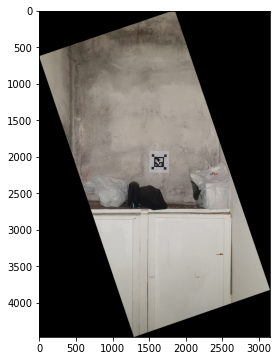

In [20]:
imshow(aruco_warped)

In [21]:
# Again you can see the logs to check what happend
image_warper_vp.logs

{'RANSAC - EDGELETS NUMBER': False,
 'RANSAC - MINIMUM SCORE': True,
 'RANSAC VALIDATION': True}

## Automated warping

In [22]:
# The general method to apply is the warp method, this one will start with the Aruco methodology 
# If no marker is detected it will switch to the vanishing point methodology
image_warper_auto = ImageWarper(os.path.join(DATA_FOLDER, 'enclosed','20200108_023419.jpg'))
auto_warped = image_warper_auto.warp()

INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ARUCO
INFO:root:CHECK - MARKER - ARUCO - SUCCESS
INFO:root:Found matches: 51
INFO:root:Found matches: 72
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED MINIMUM SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED MINIMUM SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED MODERATE SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED MODERATE SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/enclosed/20200108_023419.jpg
INFO:root:CHECK - MARKER - ENCLOSED STRONG SIFT DETECTION
INFO:root:CHECK - MARKER - ENCLOSED STRONG SIFT DETECTION - SUCCESS
INFO:root:CHECK - MARKER

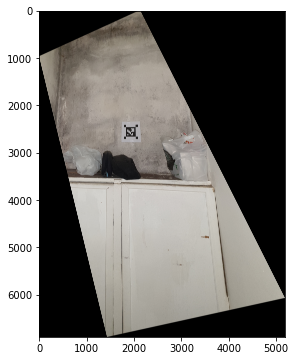

In [23]:
imshow(auto_warped)

In [24]:
# Let's test the methodology for a case without marker
image_warper_auto = ImageWarper(os.path.join(DATA_FOLDER, 'vpimg','2019-05-09 10.08.43.jpg'))

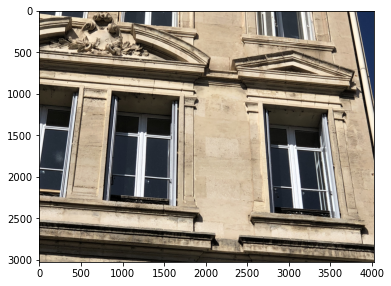

In [25]:
imshow(image_warper_auto.image)

In [26]:
img_auto = image_warper_auto.warp()

INFO:root:CHECK - RANSAC - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/vpimg/2019-05-09 10.08.43.jpg
INFO:root:CHECK - RANSAC - EDGELETS NUMBER
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - SUCCESS
INFO:root:CHECK - RANSAC - EDGELETS NUMBER - 24382 edgelets found
INFO:root:Current best model has 29651.59251006914 votes at iteration 0
INFO:root:Current best model has 87880.5760581569 votes at iteration 4
INFO:root:Current best model has 110241.4322511707 votes at iteration 21
INFO:root:Current best model has 115597.36737432993 votes at iteration 40
INFO:root:Current best model has 116322.35315929426 votes at iteration 71
INFO:root:Current best model has 117076.88693595317 votes at iteration 749
INFO:root:CHECK - RANSAC - /Users/walid/Documents/Projects/Pericolo/notebooks/../data/vpimg/2019-05-09 10.08.43.jpg
INFO:root:CHECK - RANSAC - MINIMUM SCORE
INFO:root:CHECK - RANSAC - MINIMUM SCORE - SUCCESS
INFO:root:CHECK - RANSAC - MINIMUM SCORE - 117076.88693595317/15000
INFO:ro

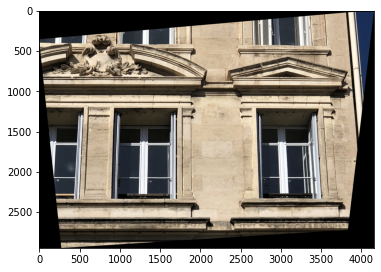

In [28]:
imshow(img_auto)

In [27]:
image_warper_auto.logs

{'MARKER - ARUCO': False,
 'RANSAC - EDGELETS NUMBER': True,
 'RANSAC - MINIMUM SCORE': True,
 'RANSAC VALIDATION': True}